(128753, 54)


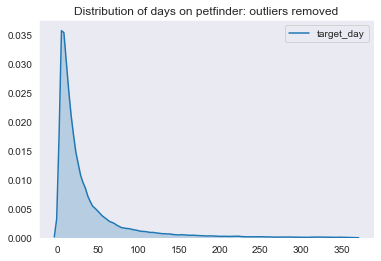

In [77]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#read in data 
chidat = pd.read_csv("data/Chicago_adopted_20k_Jan_21.csv") 
chidat['City'] = 'Chicago'

corpdat = pd.read_csv("data/Corpus_adopted_20k_Jan_29.csv") 
corpdat['City'] = 'Corpus'

houstdat = pd.read_csv("data/Houston_adopted_20k_Jan_21.csv") 
houstdat['City'] = 'Houston'

elpdat = pd.read_csv("data/ElPaso_adopted_20k_Jan_21.csv") 
elpdat['City'] = 'ElPaso'

Milwdat = pd.read_csv("data/Milw_adopted_20k_Jan_29.csv") 
Milwdat['City'] = 'Milw'

Minndat = pd.read_csv("data/Chicago_adopted_20k_Jan_21.csv") 
Minndat['City'] = 'Minne'

dendat = pd.read_csv("data/Denver_adopted_20k_Jan_29.csv") 
dendat['City'] = 'Denver'

stldat = pd.read_csv("data/StL_adopted_20k_Jan_21.csv")
stldat['City'] = 'StLouis'

inddat = pd.read_csv("data/Indy_adopted_20k_Jan_21.csv")
inddat['City'] = 'Indy'

petdat = pd.concat([chidat,corpdat, houstdat,elpdat,Milwdat, Minndat,dendat, stldat, inddat])

#petdat = ReformatDates(petdat)
    
fmt ='%Y-%m-%dT%H:%M:%S+0000'
petdat['published_at'] =  pd.to_datetime(petdat['published_at'], format=fmt)
petdat['status_changed_at'] =  pd.to_datetime(petdat['status_changed_at'], format=fmt)
petdat['time_diff'] = petdat['status_changed_at'] - petdat['published_at']
petdat['target_hour'] = petdat.time_diff.astype('timedelta64[h]')
petdat['target_day'] = petdat.time_diff.astype('timedelta64[D]')

#add top ten breed variable 
my_series = petdat['breeds.primary']
myboolseries = my_series.str.contains('Labrador Retriever|German Shepherd Dog|French Bulldog|Beagle|Pointer|oodle|Rottweiler|Yorkshire|Golden Retriever', regex=True)
petdat['top_ten'] = myboolseries

#calculate number of tags
petdat['num_tags']= petdat['tags'].str.count(',', re.I) 

#calculate number of photos
petdat['num_photos']= petdat['photos'].str.count('small', re.I) 

#calculate number of words in description 
petdat['num_words_desc']= petdat['description'].str.count(' ', re.I) 

#calculate if adopted > 1 month 
petdat['bin_month_target'] = np.where(petdat['target_day']>30, 0, 1)

#calculate if adopted > 1 week 
petdat['bin_week_target'] = np.where(petdat['target_day']>7, 0, 1)

#print(petdat.head())
#print(list(petdat.columns))
#print(petdat.shape)

#remove data where dogs are there less than a day or more than a year
petdat = petdat[(petdat["target_day"] > 2) & (petdat["target_day"] <365)]


#petdat['target_day'].mode() #   3 (?????)
#petdat['target_day'].mean() # 36.07
#petdat['target_day'].median()  #18



sns.set_style("dark")
after = sns.kdeplot(petdat['target_day'], shade=True)
plt.title("Distribution of days on petfinder: outliers removed")
plt.show(after)


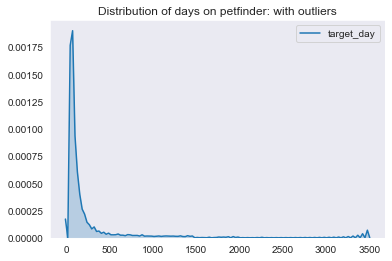

(128753, 54)


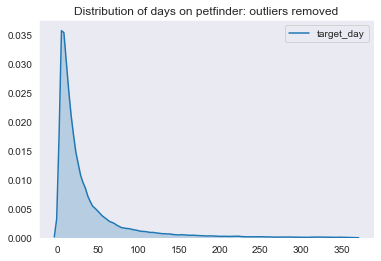

In [65]:
#Make some density plots, remove outliers
import matplotlib.pyplot as plt

sns.set_style("dark")
before = sns.kdeplot(petdat['target_day'], shade=True)
#plt.xlim(left = -2,right=10000)
plt.title("Distribution of days on petfinder: with outliers")
plt.show(before)







Text(0.5, 1, 'num_words_desc')

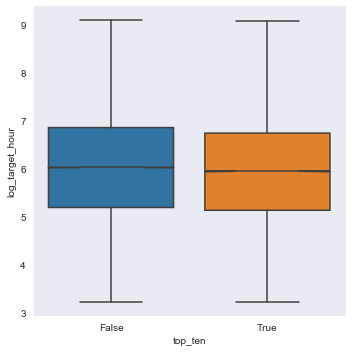

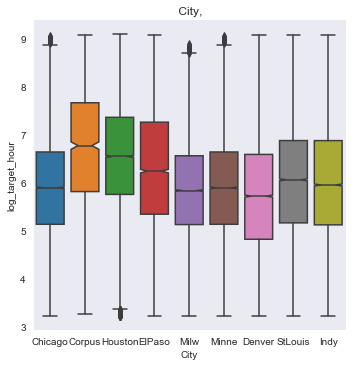

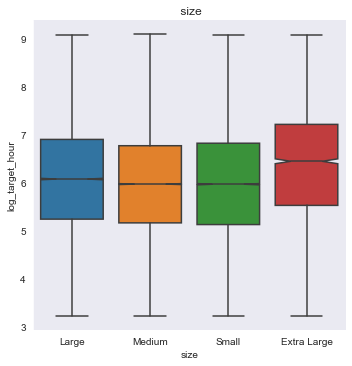

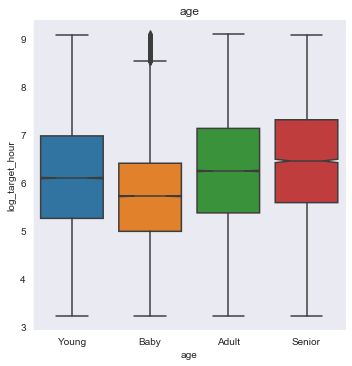

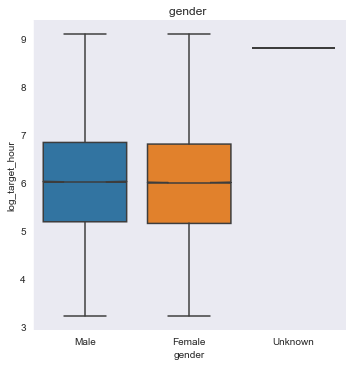

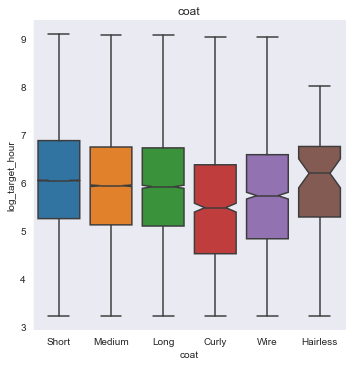

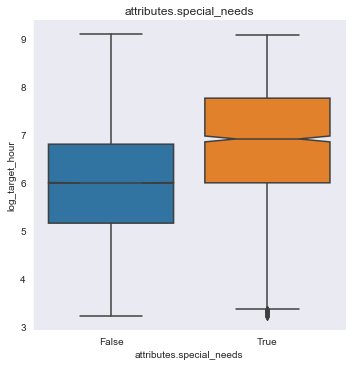

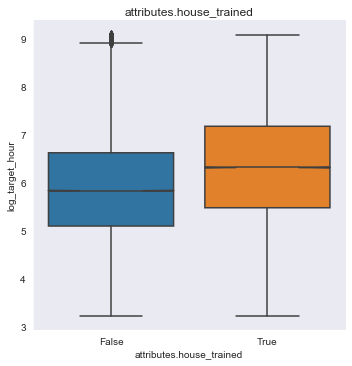

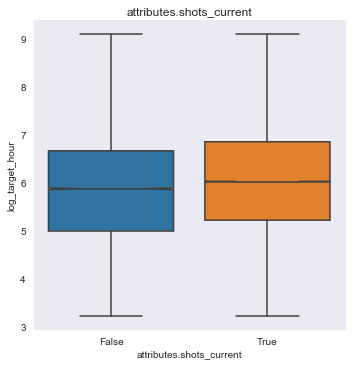

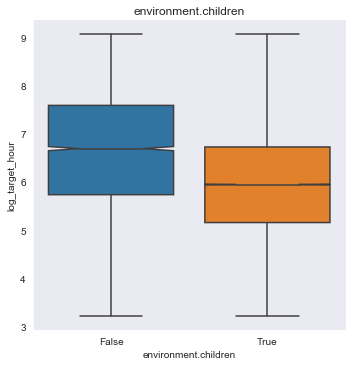

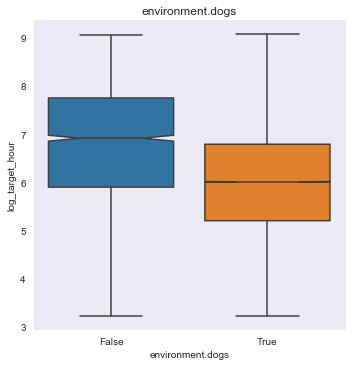

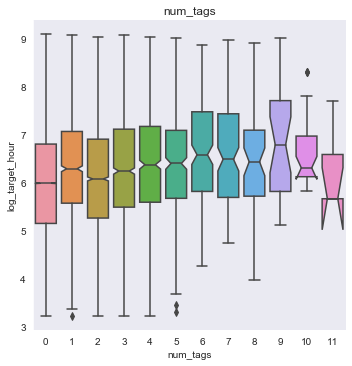

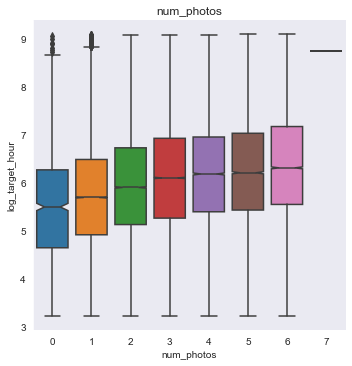

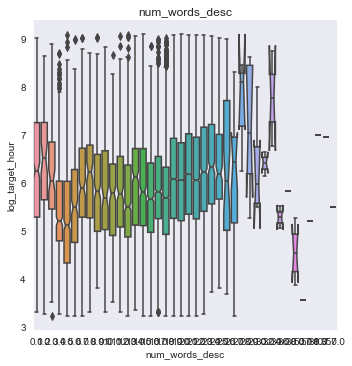

In [57]:

# plot

sns.catplot(x="top_ten", y="log_target_hour", kind="box", notch = True, data=petdat);

sns.catplot(x="City", y="log_target_hour", kind="box", notch = True, data=petdat);
plt.title(" City,")

sns.catplot(x="size", y="log_target_hour", kind="box", notch = True,data=petdat);
plt.title(" size")

sns.catplot(x="age", y="log_target_hour", kind="box", notch = True,data=petdat);
plt.title("age")

sns.catplot(x="gender", y="log_target_hour", kind="box", notch = True,data=petdat);
plt.title("gender ")

sns.catplot(x="coat", y="log_target_hour", kind="box", notch = True,data=petdat);
plt.title("coat")

sns.catplot(x="attributes.special_needs", y="log_target_hour", kind="box", notch = True,data=petdat);
plt.title("attributes.special_needs")

sns.catplot(x="attributes.house_trained", y="log_target_hour", kind="box", notch = True,data=petdat);
plt.title("attributes.house_trained")

sns.catplot(x="attributes.shots_current", y="log_target_hour", kind="box", notch = True,data=petdat);
plt.title("attributes.shots_current")

sns.catplot(x="environment.children", y="log_target_hour", kind="box", notch = True,data=petdat);
plt.title("environment.children")

sns.catplot(x="environment.dogs", y="log_target_hour", kind="box", notch = True,data=petdat);
plt.title("environment.dogs")

sns.catplot(x='num_tags', y="log_target_hour", kind="box", notch = True,data=petdat);
plt.title("num_tags")

sns.catplot(x='num_photos', y="log_target_hour", kind="box", notch = True,data=petdat);
plt.title('num_photos')

sns.catplot(x='num_words_desc', y="log_target_hour", kind="box", notch = True,data=petdat);
plt.title('num_words_desc')






